# Taller 4

<h4>1. Implemente un método que retorne la subsecuencia común más larga (SCL) apartir de la matriz C construida por el algoritmo de PD que calcula la longitud de la SCL.</h4>

In [177]:
import numpy as np

global C

def path_lcs(i,j,longer):
    path = ''
    while i >= 0 and j >= 0 and C[i][j] > 0:
        if C[i][j] == C[i][j-1]:
            j=j-1
        if C[i][j] == C[i-1][j]:
            i-=1    
        path+=longer[j-1]
        i-=1
        j-=1
        
    pathR = ''
    for i in reversed(path):
        pathR+=i
    return pathR    

def lcs3(x,y,i,j):
    global C
    if C[i,j] == -1:
        if i == 0 or j == 0:
            C[i,j] = 0
        else:
            if x[i-1]==y[j-1]:
                C[i,j] = lcs3(x,y,i-1,j-1)+1                
            else:
                C[i,j] = max(lcs3(x,y,i-1,j),lcs3(x,y,i,j-1))
                
    return C[i,j]

def lcs(X,Y):
    global C
    C = np.ones((len(X)+1,len(Y)+1))*-1
    lcs3(X,Y,len(X),len(Y))
    return path_lcs(len(X),len(Y),Y), C[len(X),len(Y)], C

In [178]:
path_lcs, len_lcs, lcs_mat = lcs('springtime','printing')

In [179]:
print path_lcs

printin


<h4>2. Para el problema del corte de la barilla (Notebook): https://github.com/ejake/algorithm_analysis/blob/master/Rod-cutting.ipynb</h4>

<h6>Implemente un método para determinar los cortes que se deben realizar a partir de la solución de PD que encuentra el valor de la solución óptima.</h6>

In [266]:
import math
import numpy as np
import pylab as pl
%matplotlib inline

Implementación simple de arriba hacia abajo (top-down)

In [267]:
def cut_rodR(p, n):
    if n==0:
        return 0
    q = float('-inf')
    for i in range(n):
        #print i
        q = max(q, p[i] + cut_rodR(p, n-1-i))
    return q

In [268]:
p = [1,5,8,9,10,17,17,20,24,30]

In [269]:
sol = cut_rodR(p,8)
print sol

22


Implementación de arriba hacia abajo con memorización (memoization)

In [270]:
def memo_cut_rodTD(p, n):
    r = [-1] * (n+1)
    return memo_cut_rodTD_aux(p,n,r)

def memo_cut_rodTD_aux(p,n,r):
    if r[n] >= 0:
        return r[n]
    if n == 0:
        q = 0
    else:
        q = float('-inf')
        for i in range(1,n+1):
            q = max(q, p[i-1]+memo_cut_rodTD_aux(p,n-i,r))
    r[n]=q
    return q

In [271]:
sol = memo_cut_rodTD(p,10)
print sol

30


Implementación abajo hacia arriba (bottom-up) con memorización

In [272]:
def memo_cut_rodBU(p,n):
    r = [0] * (n+1)
    r[0] = 0
    for j in range(1,n+1):
        q = float('-inf')
        for i in range(1,j+1):            
            q = max(q, p[i-1]+r[j-i])
        r[j] = q
    return r[n]

In [273]:
sol = memo_cut_rodBU(p,8)
print sol

22


Análisis de los 3 algoritmos

In [274]:
p = [1,5,8,9,10,17,17,20,24,30,31,35,38,39,40,47,47,50,54,60,61,65,68,69,70,77,77,80,84,90,91,95,98,99,100,107,107,110,114,120,121,125,128,129,130,137,137,140,144,150]
n = 5

<h6>Realice una comparación experimental sistemática de los algoritmos para diferentes valores de p y de n.</h6>

In [275]:
def Recalculatedtime(t1,t2):    
    return t2 - t1

In [276]:
#Gráfica simple (top-down)
import time
def analysis_time_Simple_td(n,p):
    results = []
    for i in range(n,len(p)):
        new_p = [p[j] for j in range(i)]
        tic = time.clock()#get start time
        cut_rodR(new_p,n)
        toc = time.clock()#get final time
        results.append(Recalculatedtime(tic,toc))
    return results

In [277]:
#Gráfica Memorization(top-bottom)
import time
def analysis_time_M_tb(n,p):
    results = []
    for i in range(n,len(p)):
        new_p = [p[j] for j in range(i)]
        tic = time.clock()#get start time
        memo_cut_rodBU(new_p,n)
        toc = time.clock()#get final time
        results.append(Recalculatedtime(tic,toc))
    return results

In [278]:
#Gráfica Memorization(bottom-up)
import time
def analysis_time_M_bt(n,p):
    results = []
    for i in range(n,len(p)):
        new_p = [p[j] for j in range(i)]
        tic = time.clock()#get start time
        cut_rodR(new_p,n)
        toc = time.clock()#get final time
        results.append(Recalculatedtime(tic,toc))
    return results

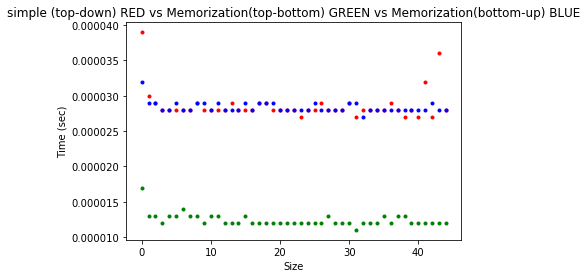

In [279]:
pl.clf()
lt = pl.title('simple (top-down) RED vs Memorization(top-bottom) GREEN vs Memorization(bottom-up) BLUE')
lx = pl.xlabel('Size')
ly = pl.ylabel('Time (sec)')
x = np.arange(len(p)-n)
y1 = np.array(analysis_time_Simple_td(n,p))
y2 = np.array(analysis_time_M_tb(n,p))
y3 = np.array(analysis_time_M_bt(n,p))
pl.plot(x, y1, 'r.')
pl.plot(x, y2, 'g.')
pl.plot(x, y3, 'b.')

<h4>3. Implemente, describa y analice un algoritmo de PD para calcular la distancia de edición entre dos cadenas. (Cormen, problem 15-5)</h4>

In [283]:
#Tomado de https://walkccc.gitbooks.io/clrs/content/Chap15/15.5.html
def CONSTRUCT_OPTIMAL_BST(root, i, j, last):
    if i == j:
        return
    if last == 0:
        print root[i, j] + "is the root"
    elif j < last:
        print root[i, j] + "is the left child of" + last
    else:
        print root[i, j] + "is the right child of" + last
    CONSTRUCT_OPTIMAL_BST(root, i, root[i, j] - 1, root[i, j])
    CONSTRUCT_OPTIMAL_BST(root, root[i, j] + 1, j, root[i, j])

<h4>4. En el rio atrato hay n embarcaderos, en cada uno de ellos se puede alquilar un bote para realizar un viaje rio abajo a otro embarcadero. Existe una tabla de tarifas que indica el costo del viaje del embarcadero i al j, para i, j = 1,2,...,n  (i menor j), puede pasar que un viaje de i a j sea más caro que una serie de viajes sucesivos intermedios, no hay un costo asociado a cambiar de bote en algún embarcadero. El problema consiste en diseñar un algoritmo de PD que determine el costo mínimo para cada par de puntos i,j.</h4>

In [298]:
def mini(A,i,j,tablaTarifas,cantPuertos):
    k=0
    elMin=j
    for k in range(i+1,cantPuertos):
        elMin=min(elMin,tablaTarifas[i,k]+A[k][j])
    return elMin


def costoMin(tablaTarifas,cantPuertos):
    A=np.zeros((cantPuertos,cantPuertos))
    l = cantPuertos
    for l in range (1, cantPuertos-1):
        for i in range(1,cantPuertos-l):
            n=int(i+l);
            A[i][n]= mini(A,i,i+l,tablaTarifas,cantPuertos)
    return A